In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import activations

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
# for 2nd attempt
from keras.initializers import glorot_uniform
from keras.callbacks import EarlyStopping

import keras.backend as K

2025-11-03 08:57:17.860090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Setting up and training a 1d Neural Network in tensorflow

## Aim
To learn the basic notation for implementing multi-layer artificial Neural Networks using Keras/TensorFlow. The function in this case is the curve: 

$f(x) = \sin^2(x)$

In [2]:
# let's choose a simple 1->1 function to train
def f(x):
    return np.sin(x)**2

In [3]:
# check it works...
print(f(np.pi/2))

1.0


In [4]:
# evaluate some data points
datasize = 1000
datapoints = np.linspace(-2,2,datasize)
datavalues = f(datapoints)
data = np.transpose([datapoints,datavalues])

In [5]:
# shuffle data - important for splitting into testing and training
np.random.shuffle(data)

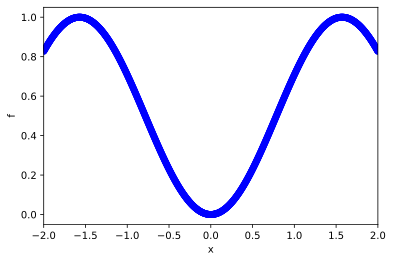

In [6]:
# plot the data points to see how they are distributed
plt.plot(datapoints, datavalues, 'bo')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

In [7]:
# Initialise model: 1-N-1
hiddenlayerdepth = 4
model = Sequential([
    Dense(hiddenlayerdepth, activation='tanh', input_shape=(1,)),
    Dense(1)
])

model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

2025-11-03 08:57:22.390717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# demonstration of how to take slices of numpy arrays
print(data[0:2,0])
print(data[0:2,1])
print(f(1.20030495))

[-1.6956957   1.83583584]
[0.9844811  0.93138356]
0.8689027716812022


In [9]:
## split into testing and training sets 20:80
print(len(data))
split = int(len(data)*80/100)
print(split)

1000
800


In [10]:
# fit the model with the data and save the information about the training
history = model.fit(
    data[0:split,0],
    data[0:split,1],
    epochs=150,
    validation_data=(data[split:,0], data[split:,1]),
    verbose=1
)

Epoch 1/150
25/25 [==============================] - 1s 9ms/step - loss: 1.7070 - val_loss: 1.5872
Epoch 2/150
25/25 [==============================] - 0s 2ms/step - loss: 1.4618 - val_loss: 1.3501
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 1.2466 - val_loss: 1.1411
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 1.0596 - val_loss: 0.9619
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.9010 - val_loss: 0.8078
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.7621 - val_loss: 0.6855
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.6486 - val_loss: 0.5818
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.5526 - val_loss: 0.4982
Epoch 9/150
25/25 [==============================] - 0s 2ms/step - loss: 0.4771 - val_loss: 0.4238
Epoch 10/150
25/25 [==============================] - 0s 2ms/step - loss: 0.4099 - val_loss: 0.3693
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.0726 - val_loss: 0.0756
Epoch 84/150
25/25 [==============================] - 0s 2ms/step - loss: 0.0703 - val_loss: 0.0733
Epoch 85/150
25/25 [==============================] - 0s 2ms/step - loss: 0.0680 - val_loss: 0.0709
Epoch 86/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0657 - val_loss: 0.0687
Epoch 87/150
25/25 [==============================] - 0s 2ms/step - loss: 0.0634 - val_loss: 0.0664
Epoch 88/150
25/25 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0640
Epoch 89/150
25/25 [==============================] - 0s 2ms/step - loss: 0.0588 - val_loss: 0.0617
Epoch 90/150
25/25 [==============================] - 0s 4ms/step - loss: 0.0565 - val_loss: 0.0595
Epoch 91/150
25/25 [==============================] - 0s 3ms/step - loss: 0.0543 - val_loss: 0.0571
Epoch 92/150
25/25 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0549
Epoch 93/150


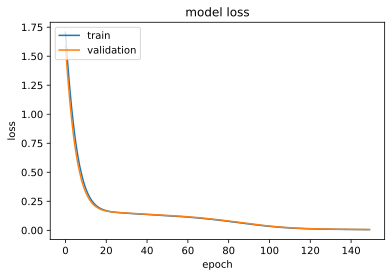

In [11]:
# now we can plot the history to see how the loss function for the
# training and validation set changed with epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
print(model.predict([1]))
print(f(1))

print(model.predict([0.1]))
print(f(0.1))

1/1 [==============================] - 0s 187ms/step
[[0.6299128]]
0.7080734182735712
1/1 [==============================] - 0s 101ms/step
[[0.07484323]]
0.009966711079379185


In [13]:
datapoints2 = np.linspace(-2,2,1000)
datavalues2 = f(datapoints2)
datavaluespred = model.predict(datapoints2)

32/32 [==============================] - 0s 1ms/step


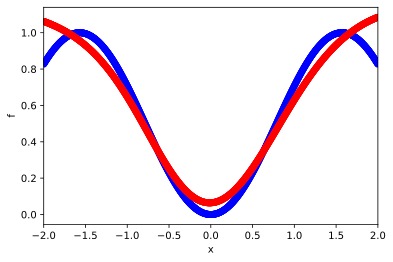

In [14]:
plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, datavaluespred, 'ro')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

# Let's try again with a more complicated model

In [52]:
# try again with early stopping criteria
tf.keras.backend.clear_session()

In [53]:
# Initialise model: 1-8-4-1
model2 = Sequential([
    Dense(100, activation='tanh', input_shape=(1,)),
    Dense(1)
])

model2.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

In [54]:
ES = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=100,
    verbose=2,
    restore_best_weights=True)

history2 = model2.fit(
    data[0:split,0],
    data[0:split,1],
    epochs=2000,
    validation_data=(data[split:,0], data[split:,1]),
    callbacks=[ES],
    batch_size=128,
    verbose=1
)

Epoch 1/2000
7/7 [==============================] - 1s 31ms/step - loss: 0.4770 - val_loss: 0.3852
Epoch 2/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.3648 - val_loss: 0.3043
Epoch 3/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.2904 - val_loss: 0.2423
Epoch 4/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.2307 - val_loss: 0.1961
Epoch 5/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1876 - val_loss: 0.1662
Epoch 6/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1604 - val_loss: 0.1491
Epoch 7/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1460 - val_loss: 0.1430
Epoch 8/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1405 - val_loss: 0.1421
Epoch 9/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.1389 - val_loss: 0.1431
Epoch 10/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1393 - val_loss: 0.1433
Epoch 11/2000
7/7 

Epoch 84/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.1314 - val_loss: 0.1354
Epoch 85/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1314 - val_loss: 0.1348
Epoch 86/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1311 - val_loss: 0.1347
Epoch 87/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.1311 - val_loss: 0.1347
Epoch 88/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1308 - val_loss: 0.1349
Epoch 89/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1309 - val_loss: 0.1346
Epoch 90/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1308 - val_loss: 0.1349
Epoch 91/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1311 - val_loss: 0.1343
Epoch 92/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1305 - val_loss: 0.1339
Epoch 93/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.1304 - val_loss: 0.1339
Epoch 94/2

7/7 [==============================] - 0s 6ms/step - loss: 0.0876 - val_loss: 0.0917
Epoch 167/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0855 - val_loss: 0.0901
Epoch 168/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0835 - val_loss: 0.0882
Epoch 169/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0813 - val_loss: 0.0854
Epoch 170/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0793 - val_loss: 0.0835
Epoch 171/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0769 - val_loss: 0.0814
Epoch 172/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0746 - val_loss: 0.0788
Epoch 173/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0722 - val_loss: 0.0768
Epoch 174/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0704 - val_loss: 0.0743
Epoch 175/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0676 - val_loss: 0.0720
Epoch 176/2000


7/7 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.0166
Epoch 249/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0153 - val_loss: 0.0171
Epoch 250/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0153 - val_loss: 0.0164
Epoch 251/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.0152 - val_loss: 0.0164
Epoch 252/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0151 - val_loss: 0.0163
Epoch 253/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0150 - val_loss: 0.0163
Epoch 254/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0149 - val_loss: 0.0161
Epoch 255/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0150 - val_loss: 0.0161
Epoch 256/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0150 - val_loss: 0.0160
Epoch 257/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0147 - val_loss: 0.0160
Epoch 258/2000

7/7 [==============================] - 0s 6ms/step - loss: 0.0089 - val_loss: 0.0095
Epoch 331/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.0094
Epoch 332/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.0094
Epoch 333/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.0092
Epoch 334/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.0091
Epoch 335/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0086 - val_loss: 0.0091
Epoch 336/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0085 - val_loss: 0.0091
Epoch 337/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0084 - val_loss: 0.0090
Epoch 338/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.0084 - val_loss: 0.0089
Epoch 339/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0083 - val_loss: 0.0088
Epoch 340/2000

7/7 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 413/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 414/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 415/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 416/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 417/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0047
Epoch 418/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 419/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 420/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 421/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 422/2000


7/7 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 495/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 496/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 497/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 498/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 499/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 500/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 501/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 502/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 503/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 504/2000


7/7 [==============================] - 0s 9ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 577/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 578/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 579/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 580/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 581/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 582/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 583/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 584/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 585/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 586/2000


7/7 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 659/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 660/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 661/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 662/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 663/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 664/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 665/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 666/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 667/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 668/2000


7/7 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 741/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 742/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 743/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 744/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 745/2000
7/7 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 746/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 747/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 748/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 749/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 750/2000


7/7 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 823/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 824/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 825/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 826/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 827/2000
7/7 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 828/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 829/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 830/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 831/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 832/2000

7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 905/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 906/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 907/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 908/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 909/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 910/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 911/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 912/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 913/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 914/2000

7/7 [==============================] - 0s 7ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 987/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 988/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 989/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 990/2000
7/7 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 991/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 992/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 993/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 994/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 995/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 996/2000

Epoch 1066/2000
7/7 [==============================] - 0s 6ms/step - loss: 9.4780e-04 - val_loss: 8.8522e-04
Epoch 1067/2000
7/7 [==============================] - 0s 6ms/step - loss: 9.2685e-04 - val_loss: 0.0011
Epoch 1068/2000
7/7 [==============================] - 0s 6ms/step - loss: 9.4962e-04 - val_loss: 9.6744e-04
Epoch 1069/2000
7/7 [==============================] - 0s 6ms/step - loss: 9.2475e-04 - val_loss: 9.3019e-04
Epoch 1070/2000
7/7 [==============================] - 0s 6ms/step - loss: 9.5062e-04 - val_loss: 0.0010
Epoch 1071/2000
7/7 [==============================] - 0s 9ms/step - loss: 9.1773e-04 - val_loss: 8.9335e-04
Epoch 1072/2000
7/7 [==============================] - 0s 6ms/step - loss: 8.7553e-04 - val_loss: 9.1558e-04
Epoch 1073/2000
7/7 [==============================] - 0s 6ms/step - loss: 8.6865e-04 - val_loss: 8.9734e-04
Epoch 1074/2000
7/7 [==============================] - 0s 6ms/step - loss: 9.0995e-04 - val_loss: 0.0011
Epoch 1075/2000
7/7 [==========

7/7 [==============================] - 0s 6ms/step - loss: 6.8338e-04 - val_loss: 7.1702e-04
Epoch 1142/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.7014e-04 - val_loss: 6.6525e-04
Epoch 1143/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.9659e-04 - val_loss: 7.3698e-04
Epoch 1144/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.9429e-04 - val_loss: 8.1049e-04
Epoch 1145/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.6399e-04 - val_loss: 7.7989e-04
Epoch 1146/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.4531e-04 - val_loss: 7.3943e-04
Epoch 1147/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.3880e-04 - val_loss: 7.3627e-04
Epoch 1148/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.6508e-04 - val_loss: 6.4885e-04
Epoch 1149/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.5369e-04 - val_loss: 7.8602e-04
Epoch 1150/2000
7/7 [==============

7/7 [==============================] - 0s 9ms/step - loss: 6.0756e-04 - val_loss: 4.9618e-04
Epoch 1217/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.1729e-04 - val_loss: 5.1391e-04
Epoch 1218/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.7375e-04 - val_loss: 5.0817e-04
Epoch 1219/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.5221e-04 - val_loss: 5.2152e-04
Epoch 1220/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.2949e-04 - val_loss: 5.4735e-04
Epoch 1221/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.0108e-04 - val_loss: 5.7552e-04
Epoch 1222/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.9585e-04 - val_loss: 4.9512e-04
Epoch 1223/2000
7/7 [==============================] - 0s 7ms/step - loss: 5.2145e-04 - val_loss: 4.7357e-04
Epoch 1224/2000
7/7 [==============================] - 0s 6ms/step - loss: 5.0481e-04 - val_loss: 4.9812e-04
Epoch 1225/2000
7/7 [==============

7/7 [==============================] - 0s 10ms/step - loss: 3.6911e-04 - val_loss: 3.6256e-04
Epoch 1292/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.6771e-04 - val_loss: 3.5530e-04
Epoch 1293/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.6761e-04 - val_loss: 3.8082e-04
Epoch 1294/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.7358e-04 - val_loss: 3.5200e-04
Epoch 1295/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.7172e-04 - val_loss: 3.7858e-04
Epoch 1296/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.7583e-04 - val_loss: 4.4648e-04
Epoch 1297/2000
7/7 [==============================] - 0s 7ms/step - loss: 3.9071e-04 - val_loss: 4.0442e-04
Epoch 1298/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.6403e-04 - val_loss: 3.5278e-04
Epoch 1299/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.6193e-04 - val_loss: 3.4008e-04
Epoch 1300/2000
7/7 [=============

7/7 [==============================] - 0s 9ms/step - loss: 2.8026e-04 - val_loss: 2.6555e-04
Epoch 1367/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.7801e-04 - val_loss: 2.8502e-04
Epoch 1368/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.7947e-04 - val_loss: 2.6002e-04
Epoch 1369/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.1361e-04 - val_loss: 2.7051e-04
Epoch 1370/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.9027e-04 - val_loss: 3.3055e-04
Epoch 1371/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.0489e-04 - val_loss: 5.2935e-04
Epoch 1372/2000
7/7 [==============================] - 0s 6ms/step - loss: 4.1029e-04 - val_loss: 3.1065e-04
Epoch 1373/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.9593e-04 - val_loss: 2.7870e-04
Epoch 1374/2000
7/7 [==============================] - 0s 6ms/step - loss: 3.0392e-04 - val_loss: 3.2069e-04
Epoch 1375/2000
7/7 [==============

7/7 [==============================] - 0s 6ms/step - loss: 2.7935e-04 - val_loss: 2.7247e-04
Epoch 1442/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.2561e-04 - val_loss: 2.1194e-04
Epoch 1443/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.1824e-04 - val_loss: 2.2596e-04
Epoch 1444/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.1870e-04 - val_loss: 2.5231e-04
Epoch 1445/2000
7/7 [==============================] - 0s 7ms/step - loss: 2.2522e-04 - val_loss: 2.2545e-04
Epoch 1446/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.2213e-04 - val_loss: 2.1873e-04
Epoch 1447/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.3099e-04 - val_loss: 2.0807e-04
Epoch 1448/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.3219e-04 - val_loss: 2.0612e-04
Epoch 1449/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.1407e-04 - val_loss: 2.0818e-04
Epoch 1450/2000
7/7 [==============

7/7 [==============================] - 0s 6ms/step - loss: 1.7353e-04 - val_loss: 1.9822e-04
Epoch 1517/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.7549e-04 - val_loss: 1.7289e-04
Epoch 1518/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.7775e-04 - val_loss: 1.8898e-04
Epoch 1519/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.9429e-04 - val_loss: 1.8746e-04
Epoch 1520/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.7610e-04 - val_loss: 1.7083e-04
Epoch 1521/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.7262e-04 - val_loss: 1.6829e-04
Epoch 1522/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.9665e-04 - val_loss: 1.6675e-04
Epoch 1523/2000
7/7 [==============================] - 0s 6ms/step - loss: 2.2475e-04 - val_loss: 1.6299e-04
Epoch 1524/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.9434e-04 - val_loss: 2.2014e-04
Epoch 1525/2000
7/7 [==============

7/7 [==============================] - 0s 6ms/step - loss: 1.5802e-04 - val_loss: 1.4525e-04
Epoch 1592/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.4840e-04 - val_loss: 1.4428e-04
Epoch 1593/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.4846e-04 - val_loss: 1.5437e-04
Epoch 1594/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.5158e-04 - val_loss: 1.4766e-04
Epoch 1595/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.8576e-04 - val_loss: 1.5087e-04
Epoch 1596/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.7083e-04 - val_loss: 1.5361e-04
Epoch 1597/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.5498e-04 - val_loss: 1.9978e-04
Epoch 1598/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.5506e-04 - val_loss: 1.4558e-04
Epoch 1599/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.4278e-04 - val_loss: 1.7121e-04
Epoch 1600/2000
7/7 [==============

7/7 [==============================] - 0s 6ms/step - loss: 1.4248e-04 - val_loss: 1.2697e-04
Epoch 1667/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.5359e-04 - val_loss: 1.6266e-04
Epoch 1668/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.5957e-04 - val_loss: 1.4138e-04
Epoch 1669/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.2710e-04 - val_loss: 1.4117e-04
Epoch 1670/2000
7/7 [==============================] - 0s 9ms/step - loss: 1.3613e-04 - val_loss: 1.3467e-04
Epoch 1671/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.2869e-04 - val_loss: 1.4104e-04
Epoch 1672/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.4058e-04 - val_loss: 1.6340e-04
Epoch 1673/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.2116e-04 - val_loss: 1.5201e-04
Epoch 1674/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.2281e-04 - val_loss: 1.2994e-04
Epoch 1675/2000
7/7 [==============

7/7 [==============================] - 0s 7ms/step - loss: 1.0983e-04 - val_loss: 1.2247e-04
Epoch 1742/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.1974e-04 - val_loss: 1.2475e-04
Epoch 1743/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.1290e-04 - val_loss: 1.2183e-04
Epoch 1744/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.1112e-04 - val_loss: 1.1982e-04
Epoch 1745/2000
7/7 [==============================] - 0s 7ms/step - loss: 1.0186e-04 - val_loss: 1.2679e-04
Epoch 1746/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.1244e-04 - val_loss: 1.4254e-04
Epoch 1747/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.1057e-04 - val_loss: 1.3883e-04
Epoch 1748/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.0436e-04 - val_loss: 1.1512e-04
Epoch 1749/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.0500e-04 - val_loss: 1.0011e-04
Epoch 1750/2000
7/7 [==============

7/7 [==============================] - 0s 7ms/step - loss: 1.0399e-04 - val_loss: 9.2585e-05
Epoch 1817/2000
7/7 [==============================] - 0s 6ms/step - loss: 9.6840e-05 - val_loss: 9.5281e-05
Epoch 1818/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.2135e-04 - val_loss: 1.1643e-04
Epoch 1819/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.1021e-04 - val_loss: 1.0431e-04
Epoch 1820/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.0108e-04 - val_loss: 1.0045e-04
Epoch 1821/2000
7/7 [==============================] - 0s 9ms/step - loss: 9.7708e-05 - val_loss: 9.9121e-05
Epoch 1822/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.0047e-04 - val_loss: 8.7297e-05
Epoch 1823/2000
7/7 [==============================] - 0s 6ms/step - loss: 1.0072e-04 - val_loss: 8.5291e-05
Epoch 1824/2000
7/7 [==============================] - 0s 6ms/step - loss: 9.7952e-05 - val_loss: 9.9418e-05
Epoch 1825/2000
7/7 [==============

7/7 [==============================] - 0s 6ms/step - loss: 8.0865e-05 - val_loss: 7.3213e-05
Epoch 1892/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.4602e-05 - val_loss: 7.8572e-05
Epoch 1893/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.6037e-05 - val_loss: 7.8944e-05
Epoch 1894/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.7028e-05 - val_loss: 7.6046e-05
Epoch 1895/2000
7/7 [==============================] - 0s 10ms/step - loss: 7.6381e-05 - val_loss: 7.5488e-05
Epoch 1896/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.7607e-05 - val_loss: 7.6552e-05
Epoch 1897/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.5117e-05 - val_loss: 7.4424e-05
Epoch 1898/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.2673e-05 - val_loss: 7.4860e-05
Epoch 1899/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.4002e-05 - val_loss: 7.1160e-05
Epoch 1900/2000
7/7 [=============

7/7 [==============================] - 0s 6ms/step - loss: 6.2414e-05 - val_loss: 7.1031e-05
Epoch 1967/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.5364e-05 - val_loss: 8.5347e-05
Epoch 1968/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.1507e-05 - val_loss: 7.3412e-05
Epoch 1969/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.1157e-05 - val_loss: 6.9002e-05
Epoch 1970/2000
7/7 [==============================] - 0s 6ms/step - loss: 7.2745e-05 - val_loss: 7.7955e-05
Epoch 1971/2000
7/7 [==============================] - 0s 7ms/step - loss: 7.2719e-05 - val_loss: 8.9368e-05
Epoch 1972/2000
7/7 [==============================] - 0s 9ms/step - loss: 6.9571e-05 - val_loss: 6.9154e-05
Epoch 1973/2000
7/7 [==============================] - 0s 7ms/step - loss: 6.5855e-05 - val_loss: 6.3628e-05
Epoch 1974/2000
7/7 [==============================] - 0s 6ms/step - loss: 6.3122e-05 - val_loss: 6.3352e-05
Epoch 1975/2000
7/7 [==============

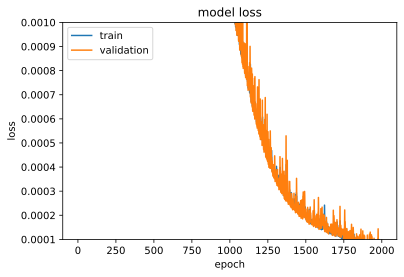

In [57]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0.0001,0.001])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

32/32 [==============================] - 0s 1ms/step


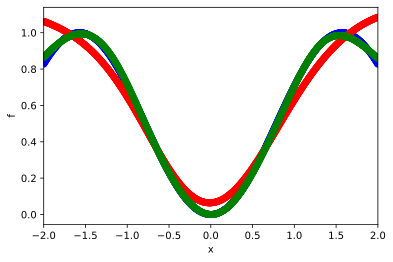

In [56]:
datavaluespred2 = model2.predict(datapoints2)

plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, datavaluespred, 'ro')
plt.plot(datapoints2, datavaluespred2, 'go')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

# Questions

1. Is 5000 points a sensible sample size? How do the fits change if you reduce or increase the data set?
2. Is the 2nd model better of worse the the simple model with one hidden layer? What if we increase the number of nodes in the single hidden layer of the first model?
3. What does the argument 'batch_size' do? What is a good value that optimises the training?
4. Vary the early stopping parameters to see how they effect the training
5. What is the effect of changing the activation function?